<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"
response = requests.get(url)
with open('survey-results-public.sqlite', 'wb') as f:
    f.write(response.content)

#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


In [5]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('main',)]


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [10]:
# your code goes here
QUERY = """SELECT CompTotal from main"""
df_comp = pd.read_sql_query(QUERY, conn)
df_comp.isnull().sum()


CompTotal    31697
dtype: int64

<Axes: >

<Figure size 800x600 with 0 Axes>

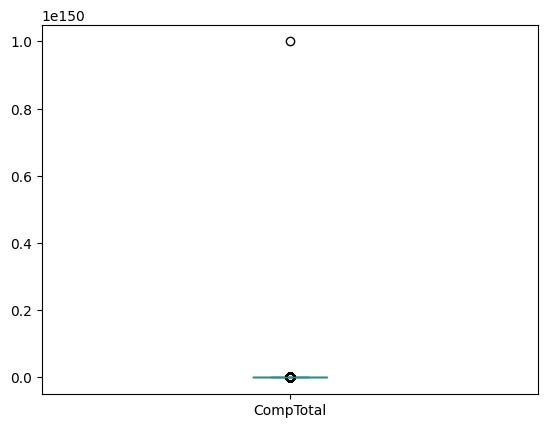

In [11]:
df_comp = df_comp.dropna()
plt.figure(figsize=(8, 6))
df_comp.plot(kind='box')

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


/tmp/ipykernel_1207/2354280761.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_age['Age_num']=df_age['Age'].replace({'Under 18 years old': 16,


<Figure size 1000x600 with 0 Axes>

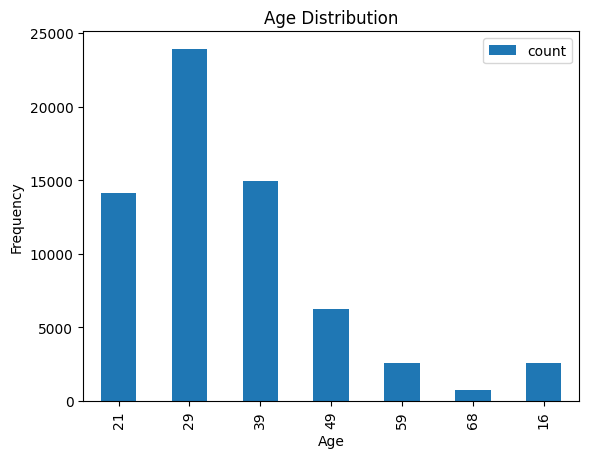

In [14]:
import numpy as np
# your code goes here
df_age = df_age.copy()
df_age['Age_num']=df_age['Age'].replace({'Under 18 years old': 16, 
                                         '18-24 years old': 21,
                                         '25-34 years old': 29,
                                         '35-44 years old': 39,
                                         '45-54 years old': 49,
                                         '55-64 years old': 59,
                                         '65 years or older': 68,
                                         'Prefer not to say': np.nan}).infer_objects(copy=False)
pd.set_option('future.no_silent_downcasting', True)
df_age = df_age.dropna()
import seaborn as sns
# Visualize the distribution using a bar chart
plt.figure(figsize=(10, 6))
df_age.plot(kind='bar', x='Age_num')  # kde=True adds a kernel density estimate
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

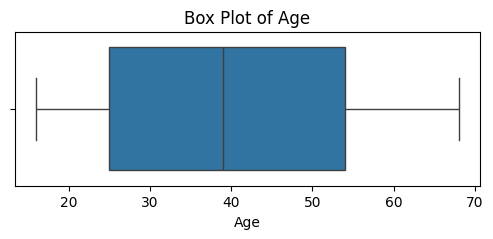

In [15]:
# Alternatively, visualize using a box plot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df_age['Age_num'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [16]:
# your code goes here
QUERY = """SELECT CompTotal, Age from main"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,CompTotal,Age
0,NaN,Under 18 years old
1,NaN,35-44 years old
2,NaN,45-54 years old
3,NaN,18-24 years old
4,NaN,18-24 years old


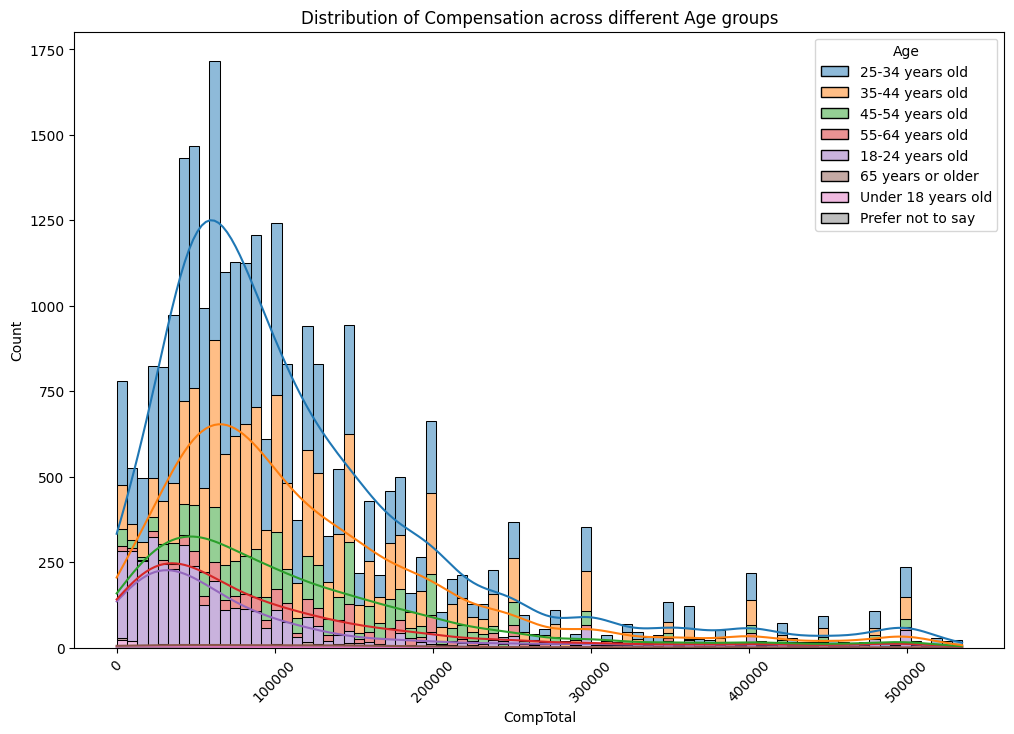

In [17]:
df_comp_age = df.dropna()
Q1 = df_comp_age['CompTotal'].quantile(0.25)
Q3 = df_comp_age['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_comp_age_clean = df_comp_age[(df_comp_age['CompTotal']>= lower_bound) & (df_comp_age['CompTotal']<= upper_bound)]
plt.figure(figsize = (12, 8))
sns.histplot(df_comp_age_clean, x='CompTotal', hue='Age', multiple='stack', kde=True)
plt.title('Distribution of Compensation across different Age groups')
plt.xticks(rotation = 45)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [18]:
# your code goes here
QUERY = """SELECT CompTotal, JobSatPoints_6 from main"""
df_comp_sat6 = pd.read_sql_query(QUERY, conn)
df_comp_sat6.head(2)

,CompTotal,JobSatPoints_6
0,NaN,NaN
1,NaN,0.0


/tmp/ipykernel_1207/2826640215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_sat6_clean['JobSatGroup'] = pd.cut(df_comp_sat6_clean['JobSatPoints_6'], bins=bins, labels=labels, right=True)


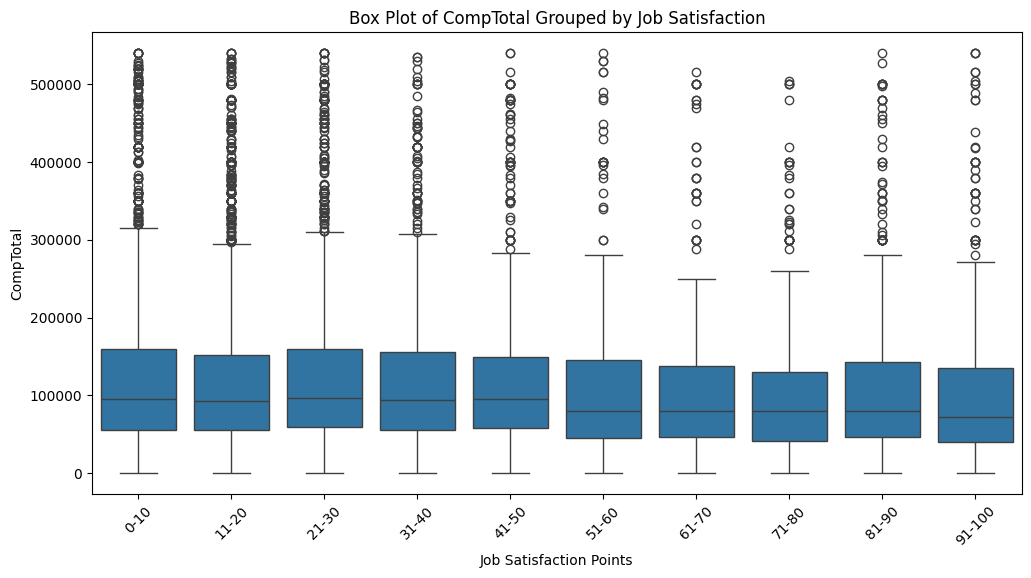

In [19]:
df_comp_sat6=df_comp_sat6.dropna()
Q1 = df_comp_sat6['CompTotal'].quantile(0.25)
Q3 = df_comp_sat6['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_comp_sat6_clean = df_comp_sat6[(df_comp_sat6['CompTotal']>= lower_bound) & (df_comp_sat6['CompTotal']<= upper_bound)]
# Create bins for JobSatPoints_6
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_comp_sat6_clean['JobSatGroup'] = pd.cut(df_comp_sat6_clean['JobSatPoints_6'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSatGroup', y='CompTotal', data=df_comp_sat6_clean)
plt.title('Box Plot of CompTotal Grouped by Job Satisfaction')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('CompTotal')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [21]:
# your code goes here
QUERY = """SELECT ConvertedCompYearly, DevType from main"""
df_ccomp_dev = pd.read_sql_query(QUERY, conn)
df_ccomp_dev

,ConvertedCompYearly,DevType
0,NaN,None
1,NaN,"Developer, full-stack"
2,NaN,Developer Experience
3,NaN,"Developer, full-stack"
4,NaN,"Developer, full-stack"
...,...,...
65432,NaN,Blockchain
65433,NaN,None
65434,NaN,"Developer, mobile"
65435,NaN,"Developer, back-end"


In [22]:
df_ccomp_dev=df_ccomp_dev.dropna(subset = ['ConvertedCompYearly', 'DevType'])
df_ccomp_dev['DevType'].value_counts().sort_values(ascending=False).head()

DevType
Developer, full-stack                            8290
Developer, back-end                              4738
Developer, front-end                             1412
Developer, desktop or enterprise applications    1061
Developer, mobile                                 825
Name: count, dtype: int64

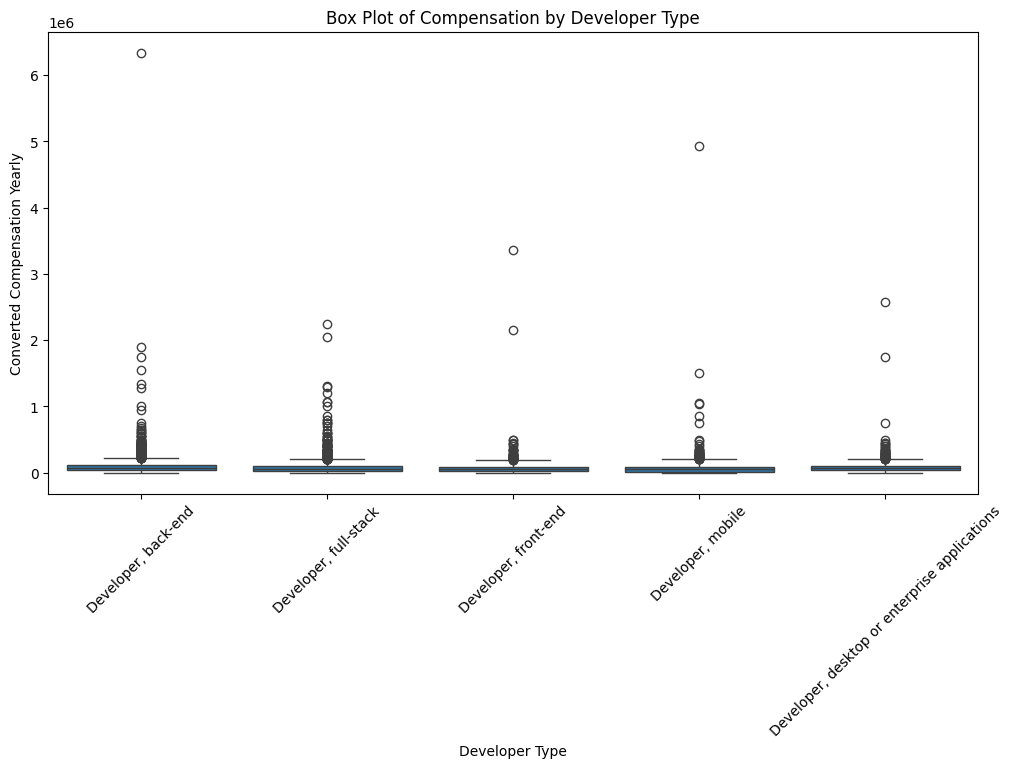

In [23]:
selected_types = [
    'Developer, full-stack',
    'Developer, back-end',
    'Developer, front-end',
    'Developer, desktop or enterprise applications',
    'Developer, mobile'
]

filtered_df = df_ccomp_dev[df_ccomp_dev['DevType'].isin(selected_types)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=filtered_df)
plt.title('Box Plot of Compensation by Developer Type')
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation Yearly')
plt.xticks(rotation=45)
plt.show()

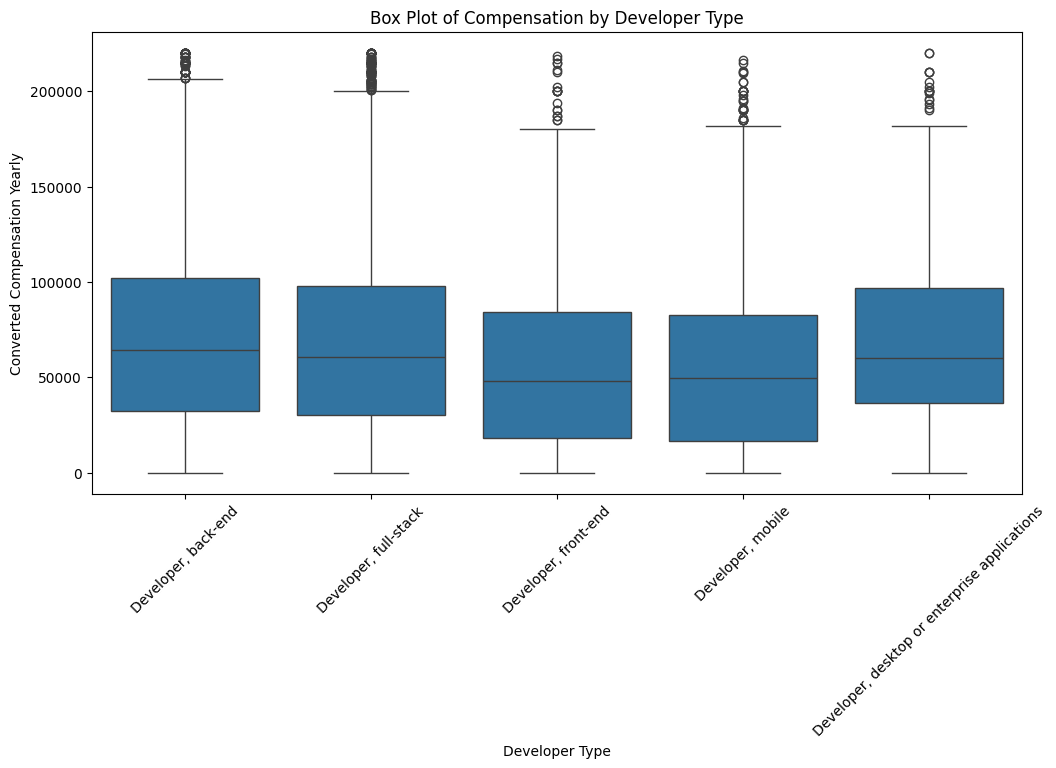

In [24]:
Q1 = df_ccomp_dev['ConvertedCompYearly'].quantile(0.25)
Q3 = df_ccomp_dev['ConvertedCompYearly'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_ccomp_dev_clean = df_ccomp_dev[(df_ccomp_dev['ConvertedCompYearly']>= lower_bound) & (df_ccomp_dev['ConvertedCompYearly']<= upper_bound)]
filtered_df_2 = df_ccomp_dev_clean[df_ccomp_dev_clean['DevType'].isin(selected_types)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=filtered_df_2)
plt.title('Box Plot of Compensation by Developer Type')
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation Yearly')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


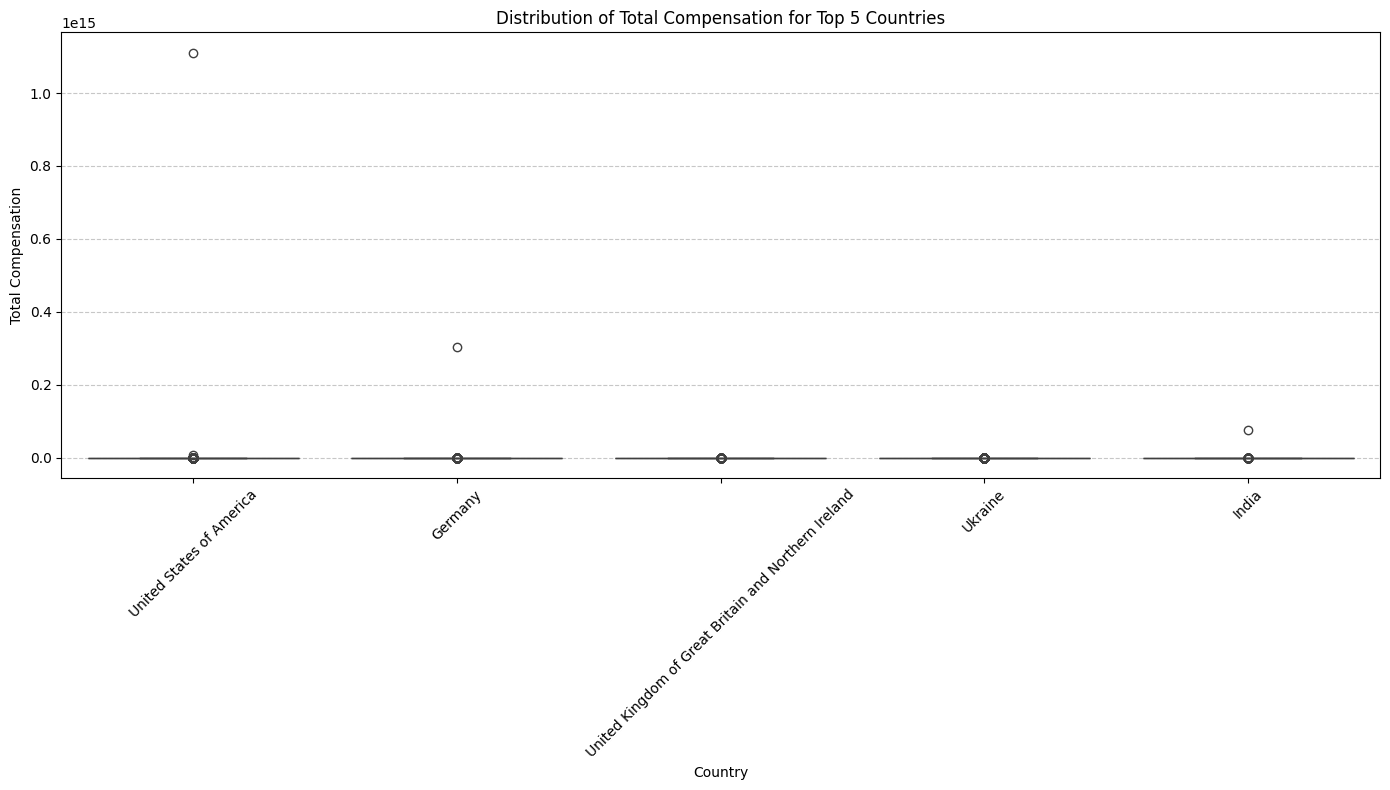

In [27]:
# your code goes here
QUERY = """SELECT CompTotal, Country from main"""
df_country = pd.read_sql_query(QUERY, conn)
df_country.head()

In [ ]:
df_country=df_country.dropna()
df_country.shape

In [ ]:
df_country['Country'].value_counts().sort_values(ascending=False)

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


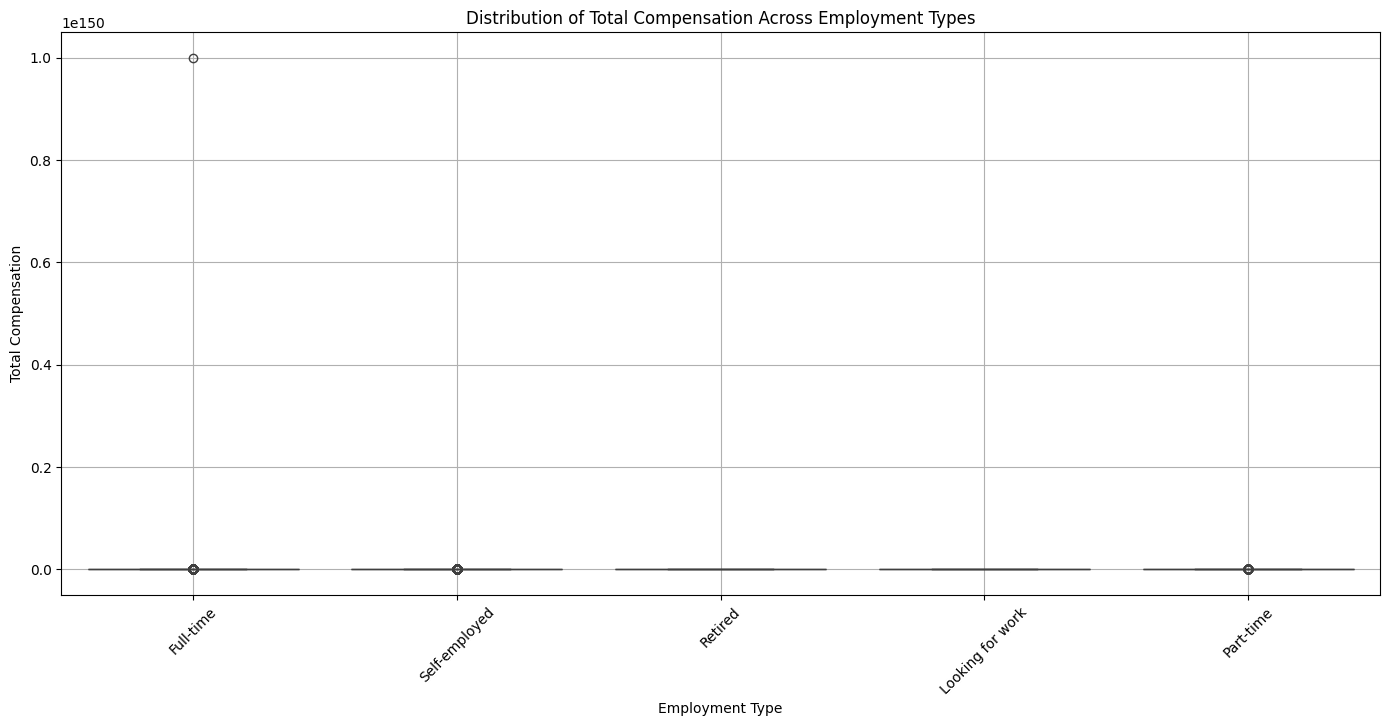

In [31]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT Employment, CompTotal FROM main WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Simplify the employment types for readability
employment_mapping = {
    'Employed, full-time': 'Full-time',
    'Employed, part-time': 'Part-time',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Not employed, and not looking for work': 'Not looking',
    'Not employed, but looking for work': 'Looking for work',
    'Retired': 'Retired',
    'Student, full-time': 'Full-time student',
    'Student, part-time': 'Part-time student',
    'Other': 'Other'
}
df['EmploymentSimplified'] = df['Employment'].map(employment_mapping)

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='EmploymentSimplified', y='CompTotal', data=df)

plt.title('Distribution of Total Compensation Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.grid(True)

plt.xticks(rotation=45)            # rotate x labels for readability
plt.tight_layout()                 # helps adjust the plot to fit labels
plt.subplots_adjust(bottom=0.25)  # add extra bottom margin if labels still clipped

plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


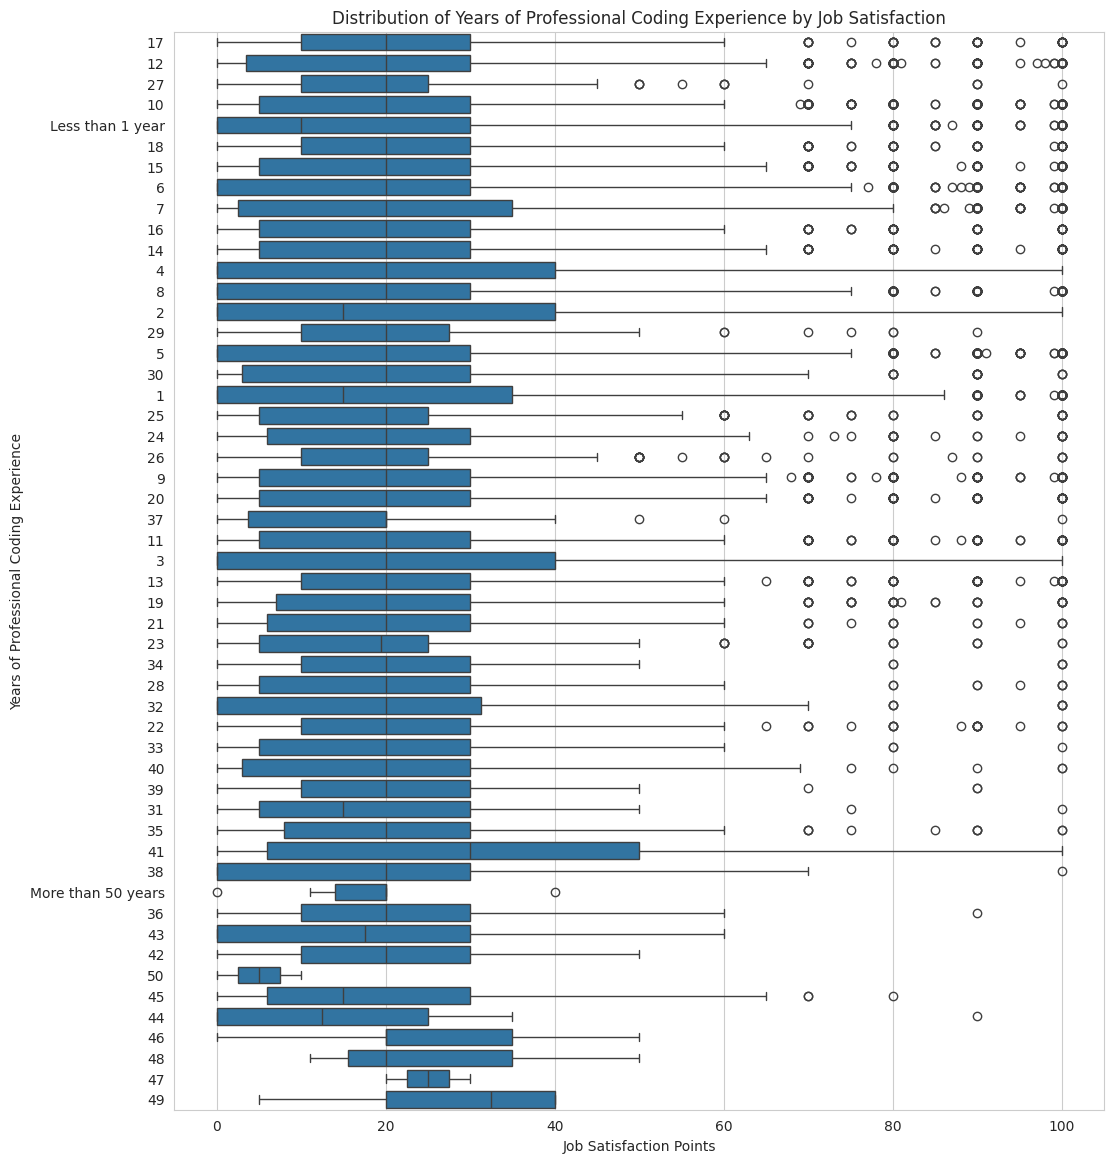

In [35]:
try:
    df = pd.read_csv('survey-data.csv')
except FileNotFoundError:
    print("Error: 'survey-data.csv' not found. Please check the file path.")
    exit()

# Filter out missing values
df_filtered = df[df['YearsCodePro'].notna() & df['JobSatPoints_6'].notna()]

# Create the box plot
plt.figure(figsize=(12, 14))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df_filtered)

# Set labels and title
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Distribution of Years of Professional Coding Experience by Job Satisfaction')

# Show the plot
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [34]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
